# Lesson 90: Support Vector Machines - Regression

### Teacher-Student Activities

In the previous classes, you learnt the undersampling technique to resample the data. In this class, you will create some SVC models with different kernels from the resampled data and observe the difference in the efficacy of the model.

Also in this class, you will learn to create a regression model using Support Vector Machine.


Let's quickly go through the activities covered in the previous class and start this lesson from **Activity 1: Model Building After Undersampling** section.

**Data Description**

There are 1559 columns in the data. Each row in the data represents one image that is tagged as `ad.` or `nonad.` in the last column. Here's the description of each column:

- **`Unnamed: 0`**: Unique ID of each image
- **`0`**: Height of an image
- **`1`**: Width of an image
- **`2`**: Aspect ratio (ratio of width to the height) of an image
- Columns **`3`** to **`1557`**: Pixel values of an image
- **`1558`**: Whether the image belongs to an advertisement or not

**Dataset credits:** *https://archive.ics.uci.edu/ml/datasets/internet+advertisements*

**Citation:** 

Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.






---

#### Loading Dataset

Import all the required Python modules and load the dataset. Here's the link to the dataset:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/ad-or-nonad.csv

In [ ]:
# Import all the required Python modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/ad-or-nonad.csv")

# Drop the 'Unnamed: 0' column from the DataFrame.
df.drop(columns = "Unnamed: 0", inplace = True)

# Get information about the dataset.
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [ ]:
# Rename the columns '0, 1, 2' and '1558' of the DataFrame with their correct names as stated  654 above.
df = df.rename(columns = {"0": "height", "1": "width", "2": "aspect ratio", "1558": "target"})

# Calculate the total sum of the missing (or null) values in all the columns in the DataFrame.
df.isnull().sum().sum()

0

---

#### Removing Rows from Pandas DataFrame

To **remove** all the rows containing question marks in both `height` and `width` columns:

1. Retrieve all the rows containing question marks in both `height` and `width` columns.

2. Use the tilde (`~`) symbol to reverse (or conjugate or negate) the conditional statement used to retrieve all the rows containing question marks in both `height` and `width` columns. 

In [ ]:
# Remove all the rows containing question marks in both height and width columns
df = df[~((df["height"] == "   ?") & (df["width"] == "   ?"))]

# Remove the above 9 rows containing unwanted values in both 'height' and 'aspect ratio' columns.
df = df[df["height"] != "   ?"]

# Remove the above 7 rows containing unwanted values in both 'height' and 'aspect ratio' columns.
df = df[df["width"] != "   ?"]

# Remove the rows containing unwanted values in the column titled '3'.
df = df[df["3"] != "?"]

# Convert the numeric values reported as the non-numeric values to numeric values in all the columns except in the target column.
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric)
df

,height,width,aspect ratio,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,30,30,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


---

#### Mapping Non-Numeric Categorical Values to Numeric

The labels or classes in the `target` column are `nonad.` and `ad.` that are non-numeric values. To be able to build a classification model, first, we have to map them to numeric values. For this, you can use the `map()` function of the Pandas module. It takes a Python dictionary as input containing the old values and new values as key-value pairs.

**Syntax:** `pandas_series.map({old_value1 : new_value1, old_value2: new_value2, ... old_valueN : new_valueN})`

Where, 

- `pandas_series` is a series that contains the values to be mapped.

- `map()` function maps the old values to new values.

- `{old_value1 : new_value1, old_value2: new_value2, ... old_valueN : new_valueN}` is a dictionary containing the old values and new values as key-value pairs.

In [ ]:
# Map the 'nonad.' and 'ad.' values to 0 and 1.
df["target"] = df["target"].map({"nonad.": 0, "ad.": 1})

# Get the count of the values stored in the target column.
df["target"].value_counts()

0    1978
1     381
Name: target, dtype: int64

---

#### Data Visualisation

Create a scatter plot between the columns `height` and `weight` of all images to find out whether they follow distinguishing patterns for the advertisement and non-advertisement images:

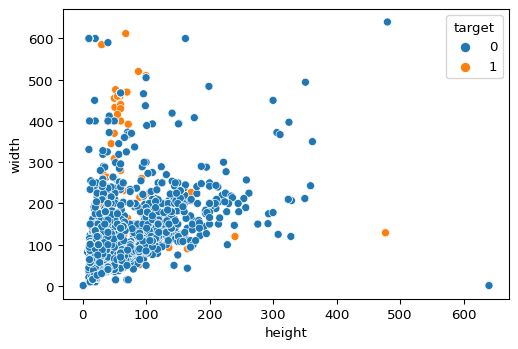

In [ ]:
# Create a scatter plot between the columns height and weight of all images.
plt.figure(figsize = (6, 4), dpi = 96)
sns.scatterplot(x = "height", y = "width", data = df, hue = "target")
plt.show()

From the scatter plot, we can see that for the advertisement images, the width values are usually higher for a particular height. Let's confirm this observation by plotting two different box plots: 
- For the width of all the advertisement.
- For the width of all the non-advertisement images.

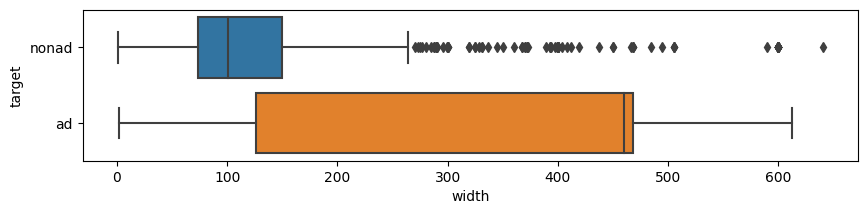

In [ ]:
# Create a boxplot to compare the width values for both advertisement and non-advertisement images.
plt.figure(figsize = (10, 2), dpi = 100)
sns.boxplot(x = "width", y = "target", data = df, orient = "h")
plt.yticks(ticks = [0, 1], labels = ["nonad", "ad"])
plt.show()

For the advertisement images:

- The width values are very spread apart from each other. 
- Additionally, the median width value is very close to the third quartile value.

So the above box plot confirms the clear distinction between the width of advertisement and non-advertisement images. When we build a classification model using SVM, it should be able to detect this distinction.

Similarly, let's check the trend for the height and aspect ratio values as well for both the types of images:

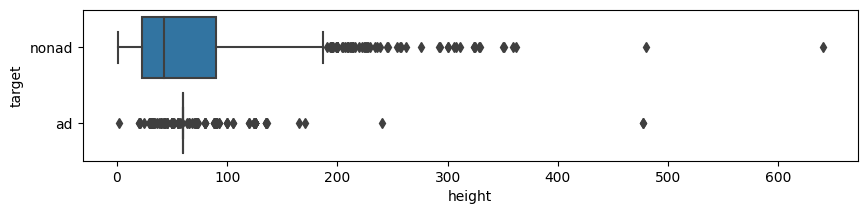

In [ ]:
# Create a boxplot to compare the width values for both advertisement and non-advertisement images.
plt.figure(figsize = (10, 2), dpi = 100)
sns.boxplot(x = "height", y = "target", data = df, orient = "h")
plt.yticks(ticks = [0, 1], labels = ["nonad", "ad"])
plt.show()

From the above graph, it appears that the first quartile, median, and third quartile height values are coinciding with each other for the advertisement images. Let's calculate these values to verify our observation:

In [ ]:
# Calculate 1st, 2nd, and 3rd quartile height values are for the advertisement images.  
df[df["target"] == 1]["height"].describe()

count    381.000000
mean      67.307087
std       39.296011
min        2.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      477.000000
Name: height, dtype: float64

So our supposition was correct. The three quartile height values for the advertisement images do coincide:


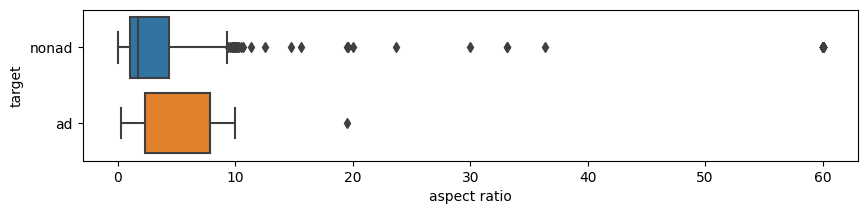

In [ ]:
# Create a boxplot to compare the aspect ratio values for both advertisement and non-advertisement images.
plt.figure(figsize = (10, 2), dpi = 100)
sns.boxplot(x = "aspect ratio", y = "target", data = df, orient = "h")
plt.yticks(ticks = [0, 1], labels = ["nonad", "ad"])
plt.show()

In this case, too, the aspect ratio values of the advertisement images are generally larger. You can see the median aspect ratio for the `nonad` images is lower than the first quartile aspect ratio for the `ad` images.

---

#### Feature Scaling

To normalise the values in an array or DataFrame using the standard scaler method, you can:

1. Import the `StandardScaler` class from the `sklearn.preprocessing` module.

2. Either create an object of the `StandardScaler` class to call the `fit_transform()` function or you can directly call this function on the `StandardScaler()` constructor. 
   
   Inside the `fit_transform()` function, you can provide either both the features and target arrays or only one of the arrays to normalise the values using the standard scaler technique. The syntax is provided below:

   **Syntax:** `StandardScaler().fit_transform(feature_dataset)`

   The `fit_transform()` function returns a NumPy array of the scaled feature values where the mean of the distribution is `0` and the standard deviation is `1`. 



In [ ]:
# Normalise the feature column values using the 'StandarScaler' method.
# Import the module
from sklearn.preprocessing import StandardScaler

# Create a DataFrame for the independent features columns
features = df[df.columns[:-1]]

# Scale the feature DataFrame
scaled_features = StandardScaler().fit_transform(features)

# Create a Pandas DataFrame for the scaled features having the same column names as the non-scaled features DataFrame.
scaled_features_df = pd.DataFrame(data = scaled_features, columns = [df.columns[:-1]])
scaled_features_df

,height,width,aspect ratio,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,1.113328,-0.235247,-0.481808,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
1,-0.125976,2.398954,0.710811,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
2,-0.563378,0.571141,0.505566,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
3,-0.071301,2.398954,0.642914,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
4,-0.071301,2.398954,0.642914,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,-0.618053,-0.964837,-0.481808,-1.777778,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,24.264171,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
2355,1.933456,-0.473324,-0.555759,-1.777778,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
2356,0.675927,-0.120049,-0.417947,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913
2357,-0.745628,-0.273647,0.215735,0.562500,-0.046087,0.0,-0.079996,-0.068446,-0.068446,-0.12272,...,-0.041213,-0.061885,-0.035684,-0.046087,-0.050497,-0.09247,-0.119111,-0.12272,-0.099226,-0.02913


The DataFrame `scaled_features_df` create above have the normalised feature values. 

Let's calculate the sum of the mean and standard deviation values of all the features in `scaled_features_df` DataFrame. They should be 0 and 1558 (because there are 1558 columns in the scaled features DataFrame) respectively: 

In [ ]:
# Verify the sum of the mean of the columns in 'scaled_features_df' DataFrame.
print(scaled_features_df.mean().sum())
print(scaled_features_df.std().sum())

8.377642228379605e-15
1430.3031909288811


As you can see, the sum of the means is very very close to zero because they are of the order $10^{-14}$.

The sum of the standard deviations is less than 1558. This is because their $1558 - 1430 = 128$ columns having all the values as 0. Hence, their standard deviation after standard scaling is also 0.

Let's create an SVC model with a linear kernel for classification and train the model with scaled features and the target variable.

---

#### Building SVC Model

First, build an SVC model without balancing it and once again after balancing it to see any kind of performance improvement:

In [ ]:
# Create an SVC model linear using the linear kernel.
# Import the modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the training and testing data
features_train, features_test, target_train, target_test = train_test_split(scaled_features, df["target"], test_size = 0.3, random_state = 12)

# Create and train the SVC linear model.
svc_clf_lin = SVC(kernel = "linear")
svc_clf_lin.fit(features_train, target_train)
svc_clf_lin.score(features_train, target_train) # The 'score()' function returns the accuracy score of a model.

0.9969715324046032

The accuracy score of the model on the training set is about 99.69%.

Now that we have built a classification model using support vector machines, let's get the predicted target values for the training set and then compare them with the actual values by creating a confusion matrix:

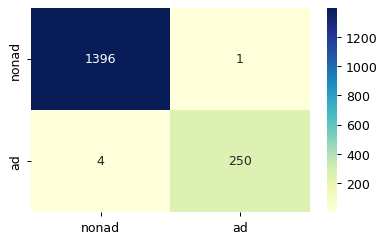

In [ ]:
# Predict the target values for the 'features_train' dataset.
# Import the modules
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions for the training features dataset.
target_train_pred = svc_clf_lin.predict(features_train)

# Create a confusion matrix DataFrame between the actual and predicted values for the training set. 
cm_train_df = pd.DataFrame(confusion_matrix(target_train, target_train_pred), index = ['nonad', 'ad'], columns = ['nonad', 'ad'])

# Create a heat map to visualise the confusion matrix DataFrame for the training set.
plt.figure(figsize = (5, 3), dpi = 90)
sns.heatmap(cm_train_df, cmap = "YlGnBu", annot = True, fmt = 'g') # The fmt = 'g' parameter represents the numeric values as string values.
plt.show()

The above heat map shows that,

1. For class **`0` (`nonad`)** values: 
  
   i. The number of **correctly** classified (truly predicted) values are 1396

   ii. The number of **incorrectly** classified (falsely predicted) values is 1

2. For class **`1` (`ad`)** values:
  
   i. The number of **correctly** classified (truly predicted) values are 250

   ii. The number of **incorrectly** classified (falsely predicted) values are 4   

The total number of misclassified values are $1 + 4 = 5$

Now, let's calculate the recall, precision, and f1-score values to further evaluate the efficacy of the model.


In [ ]:
# Calculate the recall, precision, and f1-score values to further evaluate the efficacy of the model.
print(classification_report(target_train, target_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      0.98      0.99       254

    accuracy                           1.00      1651
   macro avg       1.00      0.99      0.99      1651
weighted avg       1.00      1.00      1.00      1651



The f1-scores are excellent for both the classes (or labels). This means the SVC model that we built works extremely well on the training set. Let's see how it performs on the test set.

Now, let's repeat the above steps on the `features_test` dataset for the created model: 

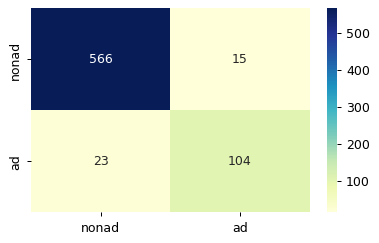

In [ ]:
# Predict the classes of the 'features_test' dataset.
# Make predictions for the testing dataset.
target_test_pred = svc_clf_lin.predict(features_test)

# Create a confusion matrix DataFrame between the actual and predicted values for the test set.
cm_test_df = pd.DataFrame(confusion_matrix(target_test, target_test_pred), index = ['nonad', 'ad'], columns = ['nonad', 'ad'])

# Create a heat map to visualise the confusion matrix DataFrame for the test set.
plt.figure(figsize = (5, 3), dpi = 90)
sns.heatmap(cm_test_df, cmap = "YlGnBu", annot = True, fmt = 'g')
plt.show()

The total number of misclassified values for the test set are $15 + 23 = 38$ which is greater than the number of misclassified values for the training set. This means that the SVC model that we built doesn't work equally well on the test set.


Nevertheless, let's calculate the recall, precision, and f1-score values to further evaluate the efficacy of the model.

In [ ]:
# Calculate the recall, precision, and f1-score values to further evaluate the efficacy of the model on the test set.
print(classification_report(target_test, target_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       581
           1       0.87      0.82      0.85       127

    accuracy                           0.95       708
   macro avg       0.92      0.90      0.91       708
weighted avg       0.95      0.95      0.95       708



The f1-score for the `ad` values is 0.85 which is slightly lower. The reason for this could be that the number of `ad` samples in the dataset is much lower than `nonad` samples. This is a case of a huge imbalance in the dataset. Let's try to balance the dataset and build an SVC model again.

---

#### Resampling - Undersampling

The support vector machine algorithm is very sensitive to numbers i.e.

- It doesn't perform well if feature and target variables contain large values.

- It takes a lot of time to train a model on a training set as compared to other classification algorithms. And if a dataset is too large, it is even slower.

Thus, if you are using an SVM model for classification on an imbalanced dataset, then first, reduce the number of the majority class samples using the undersampling technique.

To do undersampling:

1. Import the `RandomUnderSampler` class from the `imblearn.under_sampling` module.

2. Create an object of the `RandomUnderSampler` class. Inside its constructor pass:
   
   - `sampling_strategy = 'not minority'` parameter so that only the majority class samples are reduced.

   - `random_state = 42` parameter to ensure that the same samples are created every time you run the code. The value of the `random_state` parameter has to just some integer. It may or may not be 42.

3. Call the `fit_resample()` function on the object of the `RandomUnderSampler` class to complete the resampling process. The `fit_resample()` function takes both feature and target arrays and returns corresponding resampled NumPy arrays.




In [ ]:
# Reduce the number of majority class samples so that both the majority and minority classes have an equal number of records.
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'not minority', random_state = 42)
features_rus, target_rus = rus.fit_resample(scaled_features, df["target"])

# Print the object type of the values returned by the 'fit_resample()' function.
print(type(features_rus))
print(type(target_rus))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


As you can see, the resampling of the majority class is complete and the `fit_sample()` function returns NumPy arrays. 

Let's print the shape of the resampled arrays and counts of the `nonad` and `ad` samples:

In [ ]:
# Print the shape of the resampled arrays and counts of the nonad and ad samples.
print('Resampled features array shape:', features_rus.shape)
print('Resampled target array shape:', target_rus.shape, "\n")

print("'nonad' samples count =", np.sum(target_rus == 0))
print("'ad' samples count =", np.sum(target_rus == 1))

Resampled features array shape: (762, 1558)
Resampled target array shape: (762,) 

'nonad' samples count = 381
'ad' samples count = 381


---

#### Activity 1: Model Building After Undersampling

Now that we have resampled the data using the Random Undersampling technique, let's build an SVC model:

In [ ]:
# S1.1: Build an SVC model using the linear kernel on the resampled dataset. 
x_train1,x_test1,y_train1,y_test1 = train_test_split(features_rus,target_rus,test_size= 0.33, random_state = 12)
model = SVC(kernel = 'linear')
model.fit(x_train1,y_train1)
model.score(x_train1,y_train1)

1.0

The model is 99.81% accurate.

Now that we have built a classification model using support vector machines on resampled trained data, let's get the predicted target values for the training set and then compare them with the actual values by creating a confusion matrix:

In [ ]:
# S1.2: Predict the target values for the training set. Also, create a confusion matrix between the actual and predicted target values.
train_pred = model.predict(x_train1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train1,train_pred)

array([[254,   0],
       [  0, 256]])

The number of the misclassified values are the least for the training set. 

Let's calculate the precision, recall, f1-score values for the training set to further evaluate the efficacy of the model:

In [ ]:
# S1.3: Calculate the precision, recall, f1-score values for the training set to further evaluate the efficacy of the model.
from sklearn.metrics import classification_report
print(classification_report(y_train1,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       256

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



We have got perfect f1-scores on the training set. Let's find out how well the SVC model built on the resampled training set performs on the test set:

In [ ]:
# S1.4: Predict the taraget values for the test set. Also, create a confusion matrix between the actual and predicted target values.
test_pred = model.predict(x_test1)
confusion_matrix(y_test1,test_pred)

array([[116,  11],
       [ 13, 112]])

The number of misclassified values for the test set is lesser this time. It was 38 when we built an SVC model without resampling the majority class samples.

Let's calculate the precision, recall, f1-score values for the test set to further evaluate the efficacy of the model.

In [ ]:
# S1.5: Calculate the precision, recall, f1-score values for the test set to further evaluate the efficacy of the model.
print(classification_report(y_test1,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       127
           1       0.91      0.90      0.90       125

    accuracy                           0.90       252
   macro avg       0.90      0.90      0.90       252
weighted avg       0.90      0.90      0.90       252



The f1-scores for both the classes (or labels) are almost the same and are very close to 1.

**RBF Kernel**

Let's build an SVC model again using the RBF kernel and find out can we further reduce the misclassified labels on the test set:

In [ ]:
# S1.6: Build an SVC model again using the RBF kernel and find out can we further reduce the misclassified labels on the test set.
mod = SVC(kernel='rbf')
mod.fit(x_train1,y_train1)
mod.score(x_train1,y_train1)


0.9529411764705882

The accuracy of the model has reduced slightly compared to a model built using the linear kernel. Let's predict the target values on the test set features and find out the number of misclassified labels:

In [ ]:
# S1.7: Predict the target values on the test set features and find out the number of misclassified labels.
test_pred = mod.predict(x_test1)
confusion_matrix(y_test1,test_pred)

array([[122,   5],
       [ 17, 108]])

As you can see, the number of misclassified labels have further reduced from 21 to 19. This suggests that an SVC model built using the RBF kernel after reducing the majority class samples performs best on the test set. Hence, this is by far the most accurate SVC model.

The f1-scores for this case should be greater than 0.90. Let's find this out:

In [ ]:
# S1.8: Calculate the precision, recall and f1-scores for the test set for the model built using the 'rbf' kernel.
print(classification_report(y_test1,test_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       127
           1       0.96      0.86      0.91       125

    accuracy                           0.91       252
   macro avg       0.92      0.91      0.91       252
weighted avg       0.92      0.91      0.91       252



As expected, the f1-scores are greater than 0.90. We can consider this as our final SVM based classification model.

---

#### Activity 2: Support Vector Regression (SVR)

Support Vector Machines (SVM), other than classification, are used to solve regression problems as well by building models called **Support Vector Regressor (SVR)**. You already know that in regression we try to predict continuous numeric values.

In SVR, the idea is to enclose the errors between the actual and predicted values within a certain range of values called margins whereas in Linear Regression the idea is to minimise the sum of squared errors through the Ordinary Least Square (OLS) method.

Hence, in SVR we can define how much error is acceptable using the width of the margins.

SVR is used for both linear and non-linear regression.

Let's now learn to solve a regression problem through an SVR model. For that, let's, first create a dummy DataFrame. 

To create a dummy DataFrame for regression:

- Create two arrays using the `make_regression()` function of the `sklearn.datasets` module. The syntax for the `make_regression()` function is as follows:

   **Syntax:** `make_regression(n_samples, n_features,  n_informative, n_targets,  random_state)`

   where,

   - `n_samples`- Determines the number of records to be generated in a dataset

   - `n_features` - Determines the number of features (or independent variables) to be generated in the dataset

- `n_informative` - Determines the number of features contributing to the prediction of the target variable required to build a regression model

- `n_targets` - Determines the number of target (or dependent) variables

- `random_state`- Determines whether the same set of random values to be generated over and over instead of new ones. An integer value of the `random_state` parameter will produce the same results across different function calls. Popular integer random seeds are 0 and 42

The function will return two arrays. You can store these two arrays in two variables, say `reg_feat` and `reg_target`, where the former contains features (or independent variables) and the latter contains the target or (dependent variable).

Let's create dummy data using the `make_regression()` function and print the number of rows and columns in the arrays created as the output of the function.


In [ ]:
# S2.1: Create two arrays using the 'make_regression()' function and store them in the 'reg_feat' and 'reg_target' variables.
from sklearn.datasets import make_regression
ft,tg = make_regression(n_samples = 30, n_features = 5, n_informative=3,n_targets = 1, random_state = 12)
print(ft.shape,tg.shape)

(30, 5) (30,)


**Note:** The `make_regression()` function can take in more parameters that can be passed to create more customised data. You may refer to the following document:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

Let's print the data in the `reg_feat` features array (row-wise as given) and `reg_target` target.

```
row 01 => [-0.64140982  0.96574635 -1.37759603 -1.28400346 -1.2745721 ]
row 02 => [ 0.23249044 -1.14821271  0.86761195  2.11434424  1.00094276]
.
.
.
row 29 => [ 0.35133554 -1.51308726 -0.48403143 -0.76353049  0.24920321]
row 30 => [ 1.52284176  0.03765596  1.46188243 -0.2461972  -0.66429757]
```

**Steps to print feature array row-wise and target array:**

1. Create a `for` loop for the iterating the number of rows in the `reg_feat`.

2. Print each row using the index `i` and the f-strings by adding the preceding string `row {i + 1:02}` for the row numbers.

  **Note:** In the expression `1:02`, `1` is to mention the beginning of row number count and `:02` is used to present the single-digit numbers as two-digit numbers through zero padding. 

3. Print the `reg_target` array.

In [ ]:
# S2.2: Print the data row-wise stored in the feature array and print the entire target array at once.
for i in range(ft.shape[0]):
  print(f'Row {i+0:02}- {ft[i]}')
print()
print(tg)

Row 00- [-1.53472134 -0.12022767  0.00512708 -0.80698188  2.87181939]
Row 01- [ 0.07325207 -0.71385629 -0.99720384  0.03541635 -0.67794537]
Row 02- [-0.051415   -0.71626359  0.1597877   0.05052283 -0.14333741]
Row 03- [ 0.94357539 -0.0834492   0.35764423  0.6778061   0.55606037]
Row 04- [ 1.52284176  0.03765596  1.46188243 -0.2461972  -0.66429757]
Row 05- [ 1.07673999 -2.61949332  0.45769054  0.73904634  0.66750106]
Row 06- [ 0.03200602 -1.06209471  1.93321556 -0.7326291   0.84274139]
Row 07- [-0.64140982  0.96574635 -1.37759603 -1.28400346 -1.2745721 ]
Row 08- [ 0.04640264  1.40794848  0.6660776   0.05114919 -0.93597486]
Row 09- [-0.57188106  1.33583134 -0.10586232  0.31866529 -0.33759525]
Row 10- [-0.9691765  -1.44635944  0.87196812 -0.53648126  0.19792052]
Row 11- [ 0.23249044 -1.14821271  0.86761195  2.11434424  1.00094276]
Row 12- [-0.52840432  0.21497595 -0.03920917 -0.3843588  -0.25390408]
Row 13- [-0.39787973 -0.68887869 -1.25922352  0.80263045  0.27239104]
Row 14- [-1.58980861

Now that you have created two arrays, as the next step to create a dummy DataFrame, create a Python dictionary from the two arrays.

**Steps:**

1. Create an empty dictionary `data_dict`.

2. Create a `for` loop to iterate the number of columns (features). Inside the `for` loop,

   - Add $i^\text{th}$ feature to the dictionary using the index `i` and string `"feature " + str(i +1)` such that the keys are `feature 1`, `feature 2` ... `feature 5` (since there are 5 columns).

   - Add data of the column `i` from `reg_feat` array as values to the $i^\text{th}$ key in the dictionary. 
    ```
    data_dict["feature " + str(i + 1)] = reg_feat[:, i]
    ```

3. Add the last key in the dictionary as `"target"` and value as `reg_target` array.



In [ ]:
# S2.3: Create a Pandas DataFrame containing the items from the 'reg_feat' and 'reg_target' arrays.
dict1 = {}
for i in range(ft.shape[1]): 
  dict1['f'+str(i+1)]=ft[:,i]
dict1['t'] = tg 
dict1

{'f1': array([-1.53472134,  0.07325207, -0.051415  ,  0.94357539,  1.52284176,
         1.07673999,  0.03200602, -0.64140982,  0.04640264, -0.57188106,
        -0.9691765 ,  0.23249044, -0.52840432, -0.39787973, -1.58980861,
         1.50590091, -0.59782292, -2.21333348, -0.56514289,  0.47298583,
         0.5018723 , -1.00100155, -0.58526828, -1.33938922,  1.63646291,
        -0.10526799, -0.12214979,  0.22271946, -1.36563981,  0.35133554]),
 'f2': array([-0.12022767, -0.71385629, -0.71626359, -0.0834492 ,  0.03765596,
        -2.61949332, -1.06209471,  0.96574635,  1.40794848,  1.33583134,
        -1.44635944, -1.14821271,  0.21497595, -0.68887869,  0.12276163,
         1.36585291,  1.09595612, -1.78809425, -0.78228244,  0.2424395 ,
         0.64076111,  0.14655971,  2.24181779, -0.19932734, -0.20136227,
         1.40772776, -0.91386915,  1.02921118,  0.01593454, -1.51308726]),
 'f3': array([ 0.00512708, -0.99720384,  0.1597877 ,  0.35764423,  1.46188243,
         0.45769054,  1.93321

In the above code,

- We created an empty dictionary

- Then added for loop, where we iterate through the number of features to add the data into the dictionary.

- After, we added the target array data to the dictionary.
  

After creating the dictionary, create a Pandas DataFrame from the dictionary using the `from_dict()` function of the `pandas` module:

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

In [ ]:
# S2.4: Create DataFrame from the dictionary
df1 = pd.DataFrame.from_dict(data=dict1)
df1

,f1,f2,f3,f4,f5,t
0,-1.534721,-0.120228,0.005127,-0.806982,2.871819,-80.717110
1,0.073252,-0.713856,-0.997204,0.035416,-0.677945,-42.507311
2,-0.051415,-0.716264,0.159788,0.050523,-0.143337,-15.838683
3,0.943575,-0.083449,0.357644,0.677806,0.556060,56.024480
4,1.522842,0.037656,1.461882,-0.246197,-0.664298,119.974342
5,1.076740,-2.619493,0.457691,0.739046,0.667501,2.634834
6,0.032006,-1.062095,1.933216,-0.732629,0.842741,30.468188
7,-0.641410,0.965746,-1.377596,-1.284003,-1.274572,-47.911287
8,0.046403,1.407948,0.666078,0.051149,-0.935975,56.362850
9,-0.571881,1.335831,-0.105862,0.318665,-0.337595,1.143705


Now we have a `pandas` DataFrame having 30 records, 6 columns out of which 5 columns represent independent variables and 1 represent the target. 


Let's print the descriptive statistics of the DataFrame.

In [ ]:
# S2.5: Print the descriptive statistics of the dummy DataFrame
df1.describe()

,f1,f2,f3,f4,f5,t
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.185371,-0.057523,-0.248670,-0.216668,0.206826,-17.939710
std,0.957741,1.117574,1.010759,1.282780,0.961081,71.311189
min,-2.213333,-2.619493,-2.091691,-3.147417,-1.274572,-204.781373
25%,-0.630513,-0.765778,-1.076305,-0.973893,-0.620386,-70.009602
50%,-0.113709,-0.033757,-0.110391,-0.315278,0.223562,-3.393210
75%,0.321624,0.884500,0.468765,0.475166,0.731732,28.529595
max,1.636463,2.241818,1.933216,3.041686,2.871819,119.974342


As it can be observed, the feature columns have almost the same range going from negative values to positive values. 

Let's check whether the values in each column follow a normal distribution.

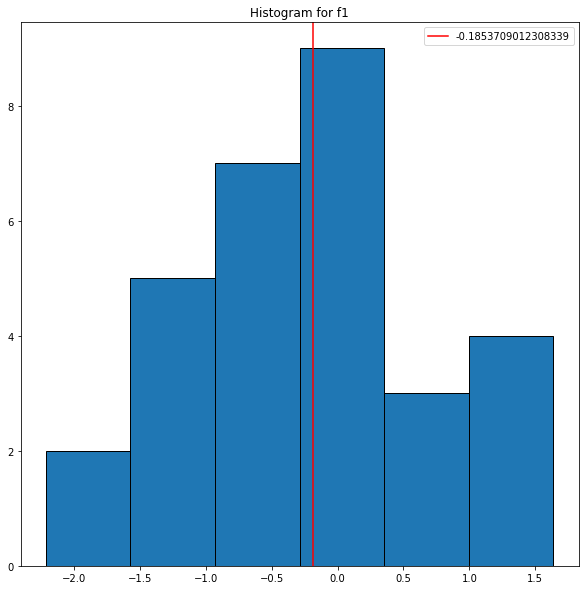

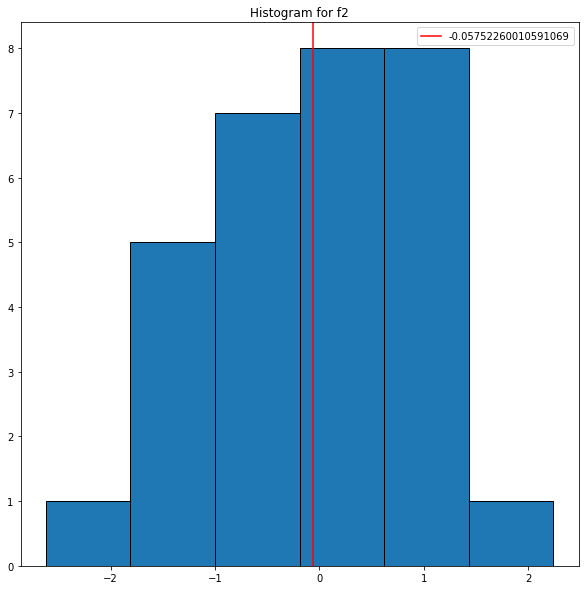

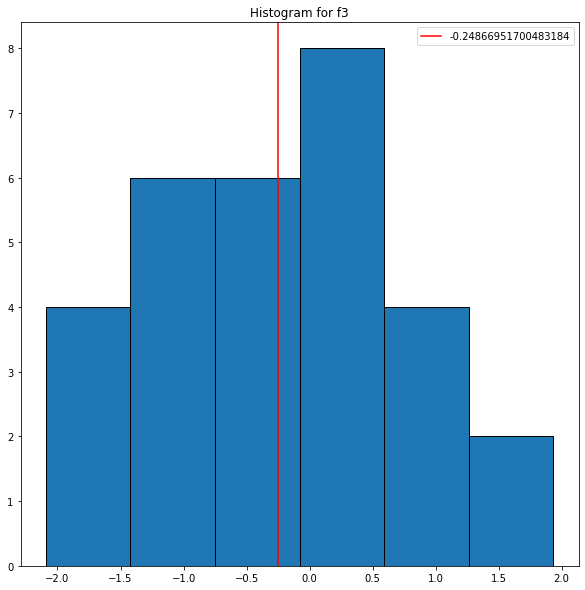

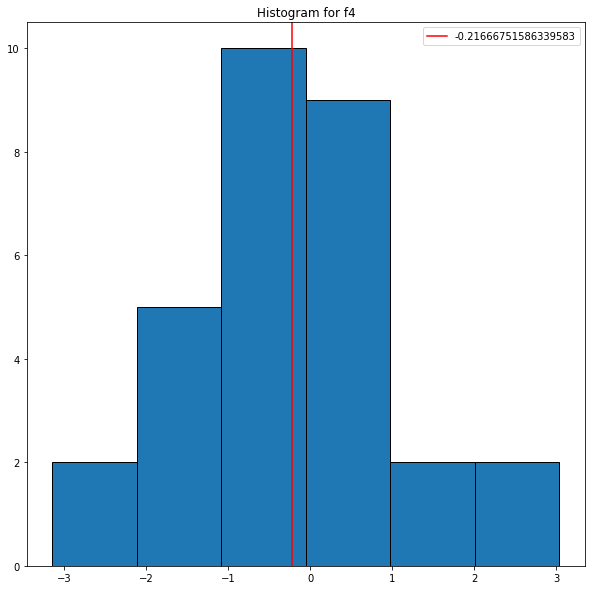

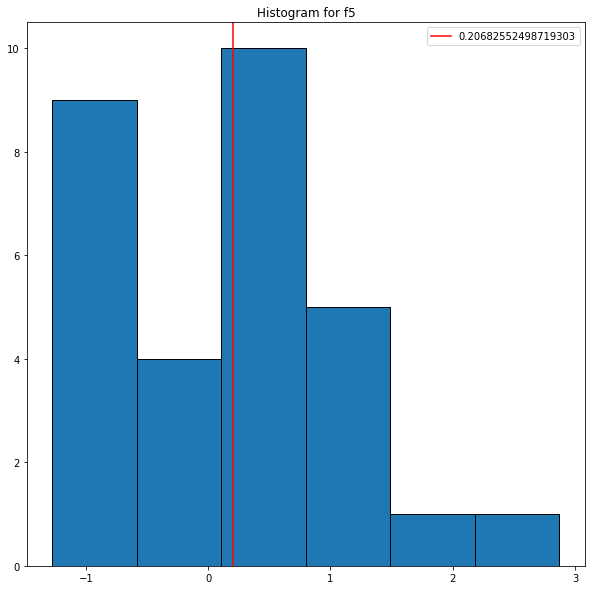

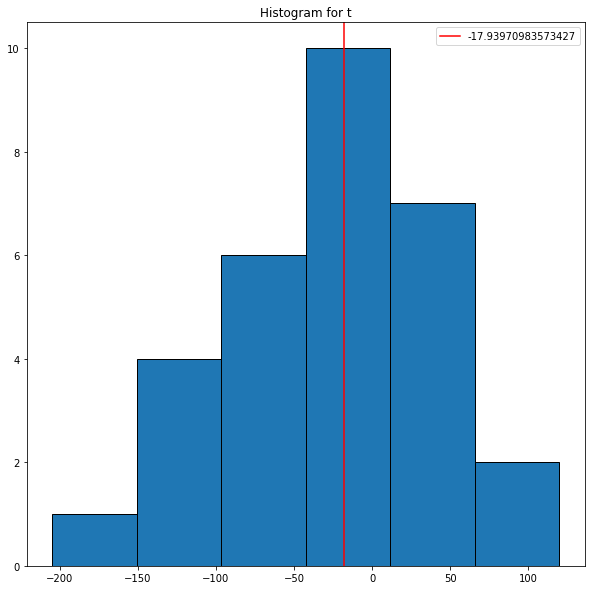

In [ ]:
# S2.6: Create histogram for all the columns in the above data frame to check whether the values in each column follow a normal distribution.
for i in df1.columns:
  plt.figure(figsize = (10,10))
  plt.title(f'Histogram for {i}')
  plt.hist(df1[i],bins= 'sturges', edgecolor = 'black')
  plt.axvline(np.mean(df1[i]), color = 'red', label = np.mean(df1[i]))
  plt.legend()
  plt.show()

We can see that all the values in each column somewhat follow a normal distribution. This will become more apparent if we increase the number of samples in the data frame.

Now, let's move ahead and check the correlation between the feature and target columns.

Let's plot check the collinearity of the `target` column with independent features.

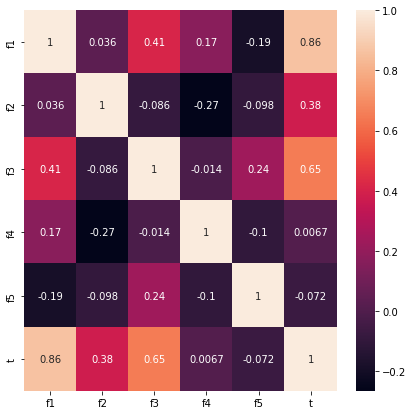

In [ ]:
# S2.7: Create a heatmap for the correlation coefficient DataFrame.
plt.figure(figsize=(7,7))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In the above graph, we can see that only `feature 1` and `feature 3` have a strong correlation with `target` columns with the correlation coefficient values `0.92` and `0.74` respectively. That means possibly only these two features will be useful to build a good regression model to predict the `target` values. Also, note that `feature 1` and `feature 3` are also correlated with each other. This is means there is a scope of multicollinearity.

**Note:** The reason for only two columns having strong collinearity with the target column is `n_informative = 2` parameter while creating dummy data.


Let's observe the independent features `feature 1` and `feature 3` individually with the `target` column.


Let's create the regplot between `feature 1` and the `target` column to observe the relationships and best-fit regression line:

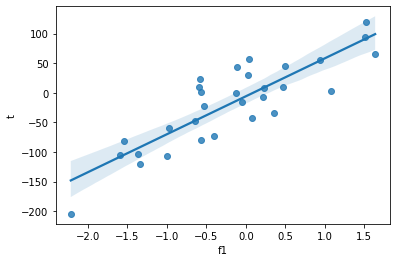

In [ ]:
# S2.8: Create a regplot between 'feature' and 'target' columns.
sns.regplot(x=df1['f1'],y=df1['t'])
plt.show()

As it can be observed, a positive correlation because $R=0.92$. 


Let's create the regplot between `feature 3` and the `target` column to observe the relationships and best-fit regression line:



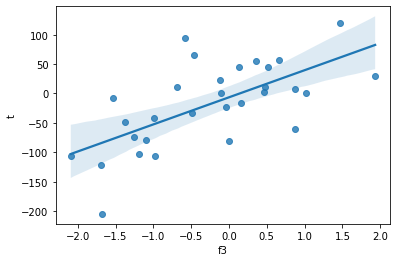

In [ ]:
# S2.9: Create a regplot between 'feature 3' and 'target' columns.
sns.regplot(x=df1['f3'],y=df1['t'])
plt.show()

As it can be observed, the correlation is positive but the points are more scattered than the `feature 1` graph as the $R=0.74$ which is less than the $R$ value for `feature 1`.

**Note:**

- `ci` stands for **confidence interval** that tells the number of values it can predict with confidence. The values outside CI are predicted by chance.

- A 95% confidence interval (CI) suggests that 95% of the target values are predicted by regression and the remaining 5% by chance (or fluke).

- The other way to look at CI is to calculate the **p-value**. When we say the p-value is less than 0.05, it means that less than 5% of the target values are predicted by chance (or fluke).

Let's stop here. In the next class, you will learn to create a SVR model and find the right parameters and their corresponding best values to enable a model to make the most accurate predictions.

---

### **Project**
You can now attempt the **Capstone Project 18 - Olivetti Faces Case-Study** on your own.

**Capstone Project 18 - Olivetti Faces Case-Study**: https://colab.research.google.com/drive/1nzcoemVcvafgfnSGbMjLx9oAjFKBBv6h

---